# Linear Regression

### 1. Import the data into pandas dataframe

In [1]:
import pandas

datadf = pandas.read_csv('sarcos_inv.csv')
datadf.columns = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22']
datadf.head()



,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,21,22
0,0.017279,-0.137077,0.026999,1.532517,0.301344,0.058259,0.128653,-0.153640,-0.335279,0.006449,...,0.017012,-2.211089,11.989628,-7.781117,11.613101,9.550076,14.643369,1.015070,-17.048688,44.104164
1,0.016336,-0.140878,0.027250,1.549670,0.302318,0.059027,0.104104,-0.047313,-0.418732,0.106274,...,0.015857,-2.337160,9.961797,-5.468357,9.550884,5.933340,15.467628,0.910548,-11.415526,37.354858
2,0.016273,-0.145307,0.029072,1.566855,0.307628,0.059027,0.080321,0.053238,-0.460963,0.188013,...,0.007958,-2.331961,7.332938,-2.434889,7.664916,3.964112,10.309203,0.921360,-5.772058,30.676065
3,0.017279,-0.150051,0.031083,1.584416,0.314162,0.059027,0.058840,0.133810,-0.462264,0.263975,...,-0.001271,-2.249311,3.797804,0.467865,6.160604,3.175643,2.868096,1.059957,-0.491542,25.920128
4,0.018818,-0.154544,0.034256,1.602449,0.319723,0.058259,0.036592,0.140750,-0.435916,0.318977,...,-0.006587,-2.123942,0.373019,2.622800,4.442314,2.821629,-1.571357,1.306848,4.210767,17.594261


### 2. Visualization of data

In [2]:
import matplotlib.pyplot as plt

#### i. Histogram Plots

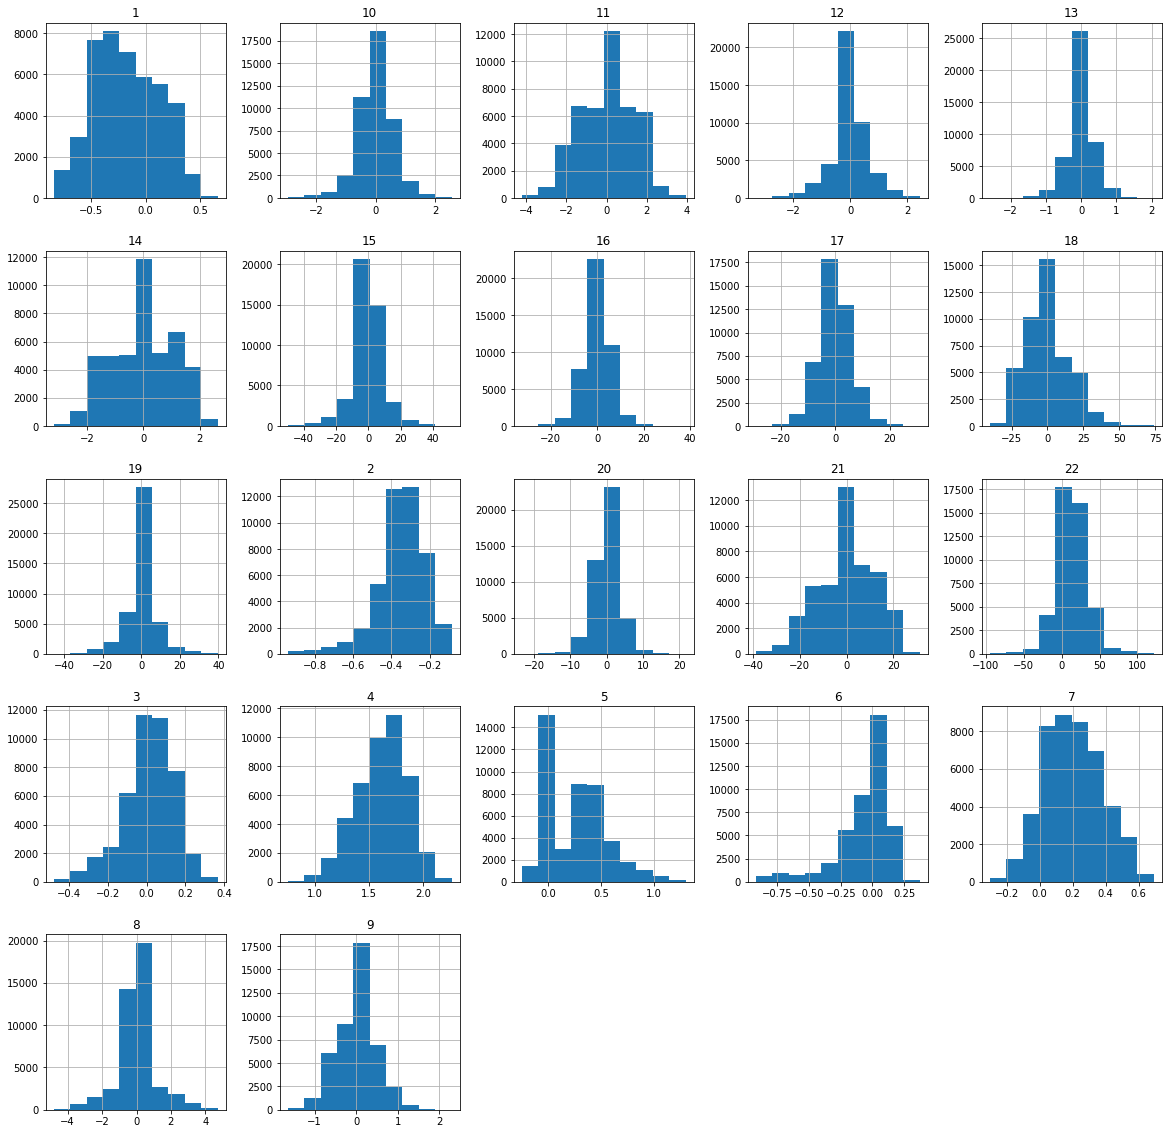

In [3]:
datadf.hist(figsize = (20, 20))
plt.show()

#### ii. Correlation Heatmap

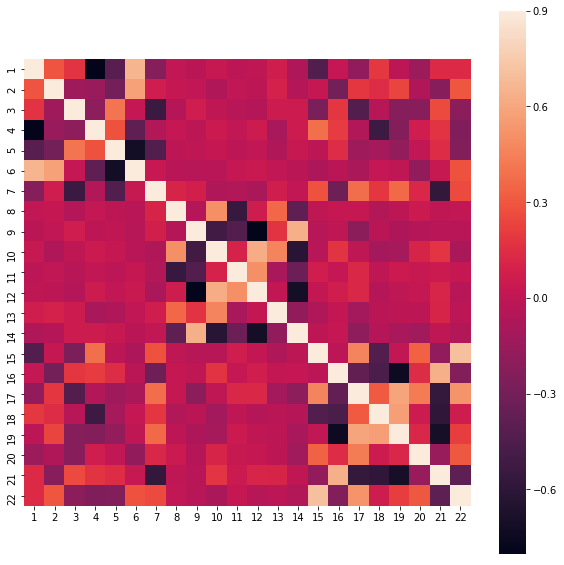

In [4]:
import seaborn as sns

corrmat = datadf.corr()
fig = plt.figure(figsize = (10, 10))

sns.heatmap(corrmat, vmax = 0.9, square = True)
plt.show()

#### iii. Distribution Plot for Target Variable 

C:\Program Files\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


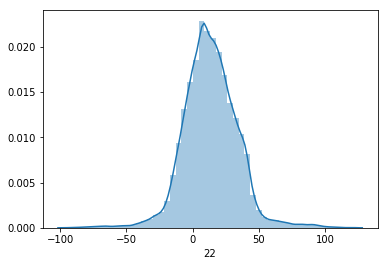

In [5]:
sns.distplot(datadf['22'])

### Linear Regression

#### a. Normalization of Data

In [6]:
datadf_norm = (datadf - datadf.mean())/datadf.std()      # Normalization of data
datadf_norm.head()

,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,21,22
0,0.632958,1.685811,0.113251,-0.365196,0.114271,0.560287,-0.427573,-0.142974,-0.704828,0.012529,...,0.051346,-1.985020,1.260124,-1.318121,1.877321,0.628853,1.845217,0.289070,-1.420530,1.488015
1,0.629806,1.655657,0.115162,-0.290980,0.117731,0.563890,-0.567272,-0.047629,-0.880831,0.180217,...,0.048266,-2.098363,1.048027,-0.926550,1.544252,0.388116,1.949151,0.259306,-0.950729,1.158206
2,0.629595,1.620521,0.129036,-0.216625,0.136598,0.563890,-0.702613,0.042536,-0.969897,0.317524,...,0.027198,-2.093689,0.773066,-0.412958,1.239648,0.257040,1.298705,0.262385,-0.480069,0.831842
3,0.632958,1.582885,0.144349,-0.140643,0.159813,0.563890,-0.824854,0.114785,-0.972640,0.445127,...,0.002582,-2.019383,0.403315,0.078504,0.996685,0.204558,0.360426,0.301852,-0.039679,0.599440
4,0.638103,1.547241,0.168509,-0.062618,0.179571,0.560287,-0.951460,0.121008,-0.917072,0.537520,...,-0.011596,-1.906672,0.045106,0.443353,0.719163,0.180994,-0.199363,0.372156,0.352489,0.192592


#### b. Preparation of feature dataset and target values

In [7]:
import numpy as np

X = datadf_norm.iloc[:,0:21]
ones = np.ones([X.shape[0],21])
X = np.concatenate((ones,X),axis=1)    # Creates a matrix incorporating X which is compatible with theta for matrix multiplication

y = datadf_norm.iloc[:,20:21].values   # .values converts it from pandas.core.frame.DataFrame to numpy.ndarray
theta = np.zeros([1,42])

split = int(X.shape[0] * 0.6)          # Split ratio for train-test data is 6:4

X_train = X[:split,:]
y_train = y[:split]

X_test = X[split:,:]
y_test = y[split:]

print(X_train.shape)
print(theta.shape)

# Setting initial hyper parameters values

alpha = 0.01
iters = 1000

(26689, 42)
(1, 42)


#### c. Helper Functions


##### i. Cost Function

In [8]:
# Cost Function

def computeCost(X,y,theta):
    
    """This function optimizes the weights
    for every feature in the training dataset.
    The optimization technique used in this 
    case is Mean Squared Error (MSE)
    
    Parameters
    -----------
    Feature matrix 'X', Target values 'y', 
    Weights and Bias matrix 'theta'
    
    Returns
    -------
    Mean Squared Error"""
    
    tobesummed = np.power(((X @ theta.T)-y),2)     # Calculates difference between target value 'y' and calculated value 'X @ theta.T'
    return np.sum(tobesummed)/(2 * len(X))         # Summation of differences divided by 2 * length of X

##### ii. Gradient Descent 

In [9]:
import timeit
start_time = timeit.default_timer()                 # Runtime counter starts

# Gradient Descent Function

def gradientDescent(X,y,theta,iters,alpha):
    
    """This function minimizes the MSE value
    by calculating the gradient of cost function. 
    For this, we calculate the partial derrivatives
    in terms of weight and bias.
    
    Parameters
    ----------
    Feature matrix 'X', Target values 'y', 
    Weights and Bias matrix 'theta', 
    hyperparameters 'iters' and 'alpha'
               
    Returns
    -------
    updated 'theta' and corresponding 'cost' value. """
    
    cost = np.zeros(iters)
    for i in range(iters):
        theta = theta - (alpha/len(X)) * np.sum(X * (X @ theta.T - y), axis=0)
        cost[i] = computeCost(X, y, theta)
    
    return theta,cost

# Training model using feature dataset 

g,cost = gradientDescent(X_train,y_train,theta,iters,alpha)
print(g)

finalCost = computeCost(X_train,y_train,g)
print(finalCost)

elapsed = timeit.default_timer() - start_time      # Runtime counter stops
print('Runtime: ' , elapsed, ' seconds')

[[ 2.00155869e-04  2.00155869e-04  2.00155869e-04  2.00155869e-04
   2.00155869e-04  2.00155869e-04  2.00155869e-04  2.00155869e-04
   2.00155869e-04  2.00155869e-04  2.00155869e-04  2.00155869e-04
   2.00155869e-04  2.00155869e-04  2.00155869e-04  2.00155869e-04
   2.00155869e-04  2.00155869e-04  2.00155869e-04  2.00155869e-04
   2.00155869e-04 -5.97732176e-02  3.23832531e-03 -2.44919063e-02
  -7.84835973e-02 -3.74704411e-02 -1.96961354e-02 -8.46800540e-02
   1.09962177e-02 -5.16002766e-03 -2.25399751e-02  1.59669259e-03
   1.68411837e-02  1.97364675e-02  9.90658821e-03 -3.89468778e-02
   6.02439035e-03  1.61704834e-02 -7.90244951e-02 -3.40999299e-02
  -4.00976144e-03  9.00723094e-01]]
0.0012595778877809223
Runtime:  10.181177199999999  seconds


#### d. Model Performance

##### i. Cost Analysis

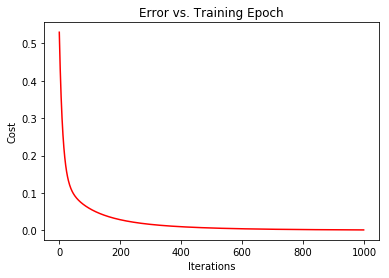

In [10]:
# Plotting the Cost against Iterations

fig, ax = plt.subplots()  
ax.plot(np.arange(iters), cost, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch') 
plt.show()

##### ii. Performance Parameters

Mean Squared Error is:  1.3614351238582116
Root Mean Squared Error is:  -0.21590232147888125


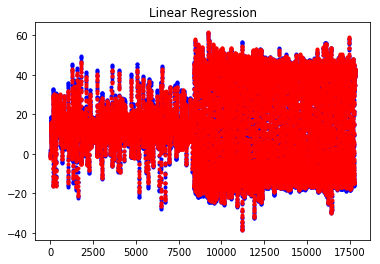

In [11]:
# Performance Parameters

# Mean Squared Error

y_pred_norm = X_test.dot(np.transpose(g))                        # Predict for Test dataset
y_pred = (y_pred_norm * datadf.std()[21]) + datadf.mean()[21]    # Unnormalise data for true values
y_test = (y_test * datadf.std()[21]) + datadf.mean()[21]
mse = np.mean((y_test - y_pred)**2)                              # Calculate MSE
print('Mean Squared Error is: ', mse)

# Root Mean Squared Error
rmse = np.mean((y_test - y_pred))                              # Calculate MSE
print('Root Mean Squared Error is: ', rmse)

# Target values Actual and Predicted

plt.figure()
plt.plot(y_test,'b.')
plt.plot(y_pred,'r.')
plt.title('Linear Regression')
plt.show()

### Toy Problem: Abalone Age Prediction

In [12]:
import pandas

abalonedf = pandas.read_csv('abalone.csv')

toyprob2df = abalonedf[['Length','Height','Whole weight','Rings']][:500]
toyprob2df.head()

,Length,Height,Whole weight,Rings
0,0.455,0.095,0.5140,15
1,0.350,0.090,0.2255,7
2,0.530,0.135,0.6770,9
3,0.440,0.125,0.5160,10
4,0.330,0.080,0.2050,7


In [13]:
import numpy as np

X = toyprob2df.iloc[:,0:3]
ones = np.ones([X.shape[0],3])
X = np.concatenate((ones,X),axis=1)    # Creates a matrix incorporating X which is compatible with theta for matrix multiplication

y = toyprob2df.iloc[:,3:4].values   # .values converts it from pandas.core.frame.DataFrame to numpy.ndarray
theta = np.zeros([1,6])

split = int(X.shape[0] * 0.6)          # Split ratio for train-test data is 6:4

X_train = X[:split,:]
y_train = y[:split]

X_test = X[split:,:]
y_test = y[split:]

alpha = 0.01
iters = 1000

In [14]:
grad_tp, cost_tp = gradientDescent(X_train,y_train,theta,iters,alpha)
print(grad_tp)

finalCost_tp = computeCost(X_train,y_train,grad_tp)
print(finalCost_tp)

[[1.97003064 1.97003064 1.97003064 2.08548918 0.68694513 5.25758587]]
3.071862710850885


Mean Squared Error is:  1.3614351238582116


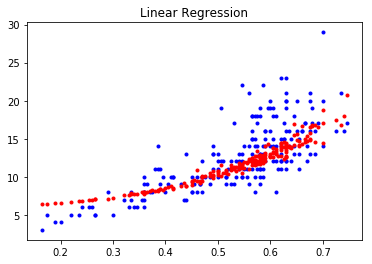

In [15]:
# Performance Parameters

# Mean Squared Error

y_pred_tp = X_test.dot(np.transpose(grad_tp))                        # Predict for Test dataset

mse_tp = np.mean((y_test - y_pred_tp)**2)                              # Calculate MSE
print('Mean Squared Error is: ', mse)

plt.figure()
plt.plot(X_test[:,3],y_test,'b.')
plt.plot(X_test[:,3],y_pred_tp,'r.')
plt.title('Linear Regression')
plt.show()

### Comparison to SKLearn Model

This comparison has been made so as to understand the performance of a python scratch model against a professional level industry tool.

In [16]:
import timeit
start_time = timeit.default_timer()


from sklearn import linear_model
import numpy as np
from sklearn import metrics


regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)


# prediction with sklearn
y_pred = regr.predict(X_test)

# MSE
sk_mse = metrics.mean_squared_error(y_test, y_pred)

print('Mean Squared Error: ', sk_mse)

elapsed = timeit.default_timer() - start_time
print('Runtime: ' , elapsed, ' seconds')

Intercept: 
 [2.46065067]
Coefficients: 
 [[0.00000000e+00 1.77635684e-15 1.06581410e-14 3.70964503e+00
  3.29866126e+01 2.87927334e+00]]
Mean Squared Error:  9.525678233736144
Runtime:  0.24508170000000007  seconds
